In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
from sklearn.datasets import make_classification

In [88]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

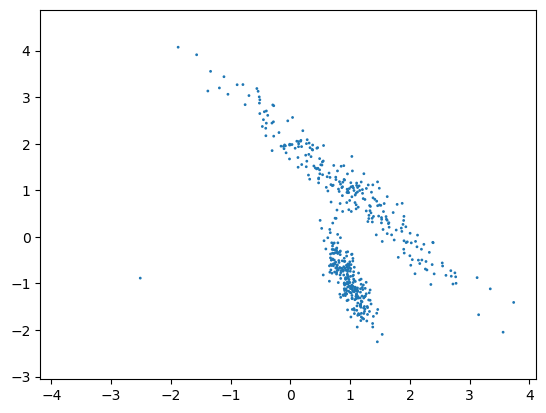

In [92]:
plt.scatter(pd.DataFrame(X)[0],pd.DataFrame(X)[1],y)

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [104]:
from sklearn.svm import SVC

In [108]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [112]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       110
           1       0.96      0.86      0.91       140

    accuracy                           0.90       250
   macro avg       0.90      0.91      0.90       250
weighted avg       0.91      0.90      0.90       250



In [114]:
model = SVC(kernel='rbf')
model.fit(X_train,y_train)
y_pred1 = model.predict(X_test)
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       107
           1       0.99      0.87      0.93       143

    accuracy                           0.92       250
   macro avg       0.92      0.93      0.92       250
weighted avg       0.93      0.92      0.92       250



In [116]:
poly = SVC(kernel='poly')
poly.fit(X_train,y_train)
y_pred2 = poly.predict(X_test)
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       125
           1       0.87      0.87      0.87       125

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250



#### hyperparameter Tuning

In [124]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[0.1,0.01,1,0.001,0.0001],
              'kernel':['rbf','linear','poly']}

In [134]:
grid = GridSearchCV(SVC(),param_grid=param_grid,cv=5,verbose=3)

In [136]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.900 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.887 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.900 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.860 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.893 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.747 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 1, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)